# Data Description

The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.The target variable for this dataset is 'Sales'. 

# Importing the dataset

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [80]:
df=pd.read_csv('Advertising.csv')

In [81]:
df.head()

,count,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [82]:
df.shape

(200, 5)

# Checking the datatypes of the columns

In [83]:
df.dtypes

count          int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

We have 200 rows and 5 columns including the target column.

# Checking Null values in the dataframe

In [84]:
df.isnull().sum()

count        0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values are present in the dataset

# Describe the dataset

In [85]:
df.describe()

,count,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Checking the distribution of the continuous value of the float type columns

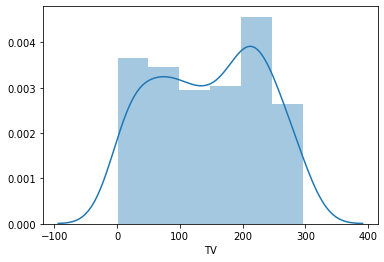

In [86]:
sns.distplot(df['TV'])

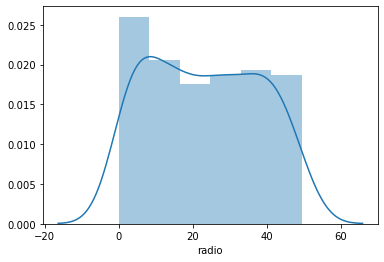

In [87]:
sns.distplot(df['radio'])

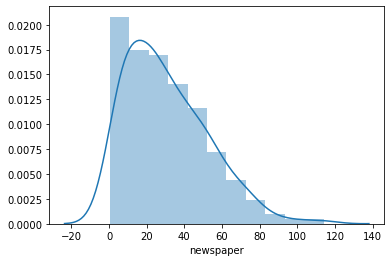

In [88]:
sns.distplot(df['newspaper'])

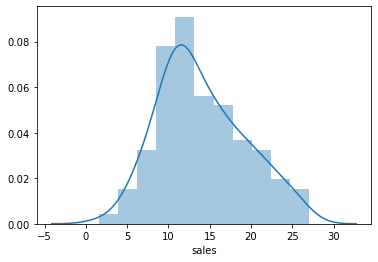

In [89]:
sns.distplot(df['sales'])

# Checking Correlation

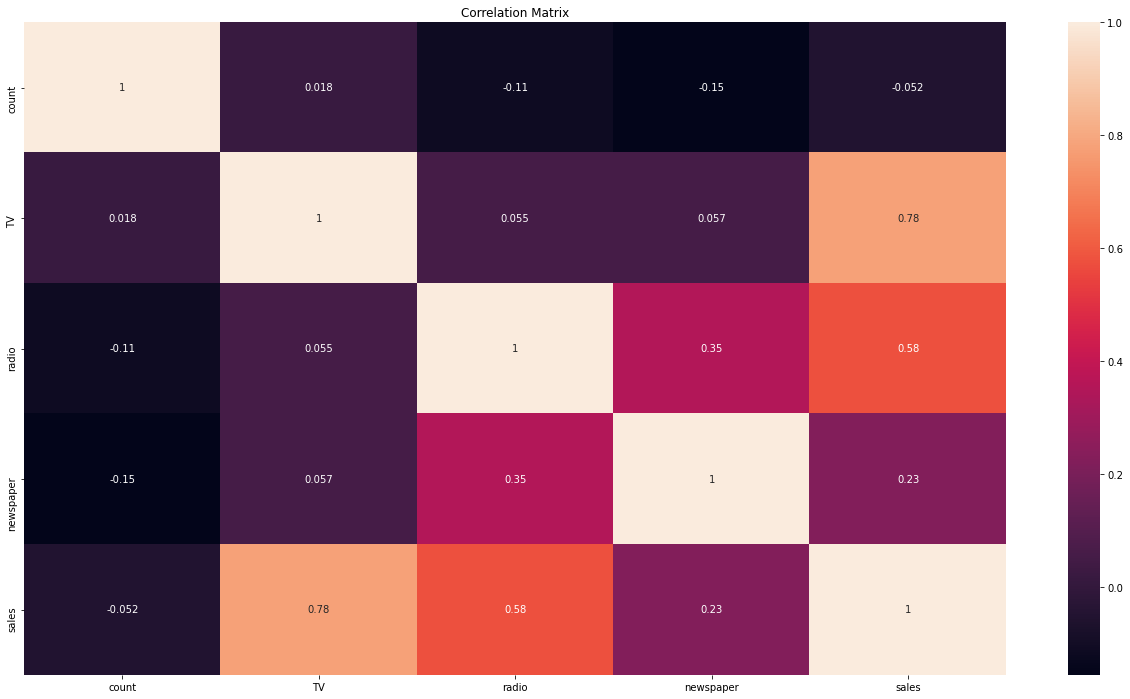

In [90]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix,we can see that TV is highly correlated with sales,then radio is also correlatd with sales(the target column).

In [91]:
corr_matrix=df.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
count       -0.051616
Name: sales, dtype: float64

Count has less than 0.01 correlation value(very weak relationship)

In [92]:
df['count'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Splitting the independent and target variable in x and y

In [93]:
x=df.drop('sales',axis=1)
y=df['sales']

# Checking skewness

In [94]:
x.skew()

count        0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

We can see skewness in the dataset,we will remove the skewness using power transform method

In [95]:
from sklearn.preprocessing import PowerTransformer
df_new=PowerTransformer(method='yeo-johnson')
df_new1=df_new.fit_transform(df.iloc[:,1:4])

In [96]:
df_N=pd.DataFrame(df_new1)
df_N

,0,1,2
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [97]:
df_N.skew()

0   -0.315199
1   -0.242968
2   -0.077942
dtype: float64

In [98]:
df.drop(['TV','radio','newspaper'],axis=1,inplace=True)

In [99]:
df.head()

,count,sales
0,1,22.1
1,2,10.4
2,3,9.3
3,4,18.5
4,5,12.9


In [100]:
df_updated=pd.concat([df,df_N],axis=1)

In [101]:
df_updated

,count,sales,0,1,2
0,1,22.1,0.948674,0.962247,1.514335
1,2,10.4,-1.191314,1.040179,0.787683
2,3,9.3,-1.647757,1.370710,1.516998
3,4,18.5,0.141020,1.142387,1.214656
4,5,12.9,0.452715,-0.748651,1.211704
...,...,...,...,...,...
195,196,7.6,-1.287908,-1.431436,-0.682576
196,197,9.7,-0.520949,-1.297017,-1.142011
197,198,12.8,0.413091,-0.875492,-1.313050
198,199,25.5,1.455843,1.177722,1.433350


In [102]:
df_updated.dtypes

count      int64
sales    float64
0        float64
1        float64
2        float64
dtype: object

# Splitting the independent and target variable in x and y

In [103]:
#for the updated DataFrame
x=df_updated.drop('sales',axis=1)
y=df_updated['sales']

In [104]:
# Checking outliers
#0-TV
#1-radio
#2-newspaper

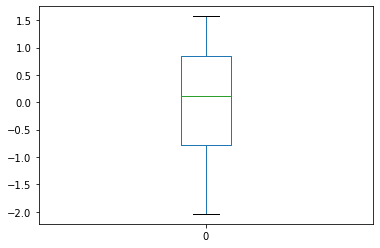

In [105]:
df_updated[0].plot.box()

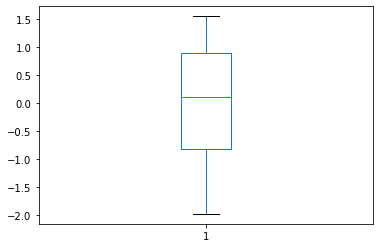

In [106]:
df_updated[1].plot.box()

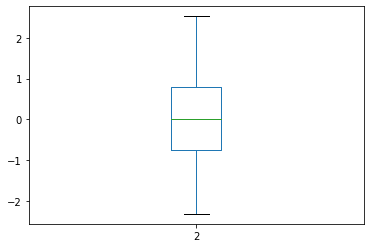

In [107]:
df_updated[2].plot.box()

No outliers present as shown in the boxplot

In [108]:
df_updated

,count,sales,0,1,2
0,1,22.1,0.948674,0.962247,1.514335
1,2,10.4,-1.191314,1.040179,0.787683
2,3,9.3,-1.647757,1.370710,1.516998
3,4,18.5,0.141020,1.142387,1.214656
4,5,12.9,0.452715,-0.748651,1.211704
...,...,...,...,...,...
195,196,7.6,-1.287908,-1.431436,-0.682576
196,197,9.7,-0.520949,-1.297017,-1.142011
197,198,12.8,0.413091,-0.875492,-1.313050
198,199,25.5,1.455843,1.177722,1.433350


# Finding best random_state

In [109]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.9364401159164685 on Random_state 13


# Creating train_test split

In [110]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=13)

In [111]:
x_train.shape

(140, 4)

In [112]:
x_test.shape

(60, 4)

In [113]:
y_train.shape

(140,)

In [114]:
y_test.shape

(60,)

In [115]:
LR=LinearRegression()

In [116]:
LR.fit(x_train,y_train)

LinearRegression()

In [117]:
LR.score(x_train,y_train)

0.8903540027262093

In [118]:
pred=LR.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)

Predicted result price: [12.80934557  4.08214377 16.94639332 13.0892695  12.39628187 23.07612158
 21.21662844 14.98989017 21.42187943 15.88831049 16.77832629  5.80999454
  7.98789884 18.8384202  17.47256694 16.62746344  7.38842599 10.07763267
 20.1227616  18.11953041 12.20468241  8.20885333 21.44128779 12.7797139
 17.63644823 19.64151616  9.59378164 13.99842553 22.83880347  7.59939437
 15.7182974  18.64853263 17.75947179  7.07523297 16.92404625  9.12469657
 10.11245942 20.44647003  4.68885539 11.04306562  9.60813508 19.08859699
 20.73260446  1.69380794 14.96941755 20.868184   19.34387042 10.71353524
 10.08153263 21.11393693 20.7960366   9.71480341 10.39899871 13.78127644
  7.28975263 14.79609356 22.72876859  7.16396066  3.40928247  8.66908994]
actual price 179    12.6
155     3.2
23     15.5
159    12.9
96     11.7
198    25.5
42     20.7
110    13.4
128    24.7
97     15.5
95     16.9
106     7.2
65      9.3
33     17.4
102    14.8
89     16.7
132     5.7
79     11.0
104    20.7
70   

In [119]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
2.014158171039942


In [120]:
print(r2_score(y_test,pred))

0.9364401159164685


In [121]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [122]:
svr.score(x_train,y_train)

0.8853488407311164

In [123]:
pred_y=svr.predict(x_test)

In [124]:
print('error:')
print(mean_squared_error(y_test,pred_y))

error:
2.2088579068998087


In [125]:
print(r2_score(y_test,pred_y))

0.9302960638652049


# Cross Validation

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
LRscores=cross_val_score(LR,x,y,cv=5)
print('Cross validation score of linear regression model:',LRscores.mean())

Cross validation score of linear regression model: 0.8959843254943888


In [128]:
svrscores=cross_val_score(svr,x,y,cv=5)
print('Cross validation score of support vector regressor model:',svrscores.mean())

Cross validation score of support vector regressor model: 0.8880536193716825


The best model is Linear Regression Model beacause the difference between r2_score and cross_val_score is(0.936-0.895=0.41)where in Support Vector Regressor model the difference is(0.930-0.888=0.42).The difference is less in Linear Regression,so it is the best model.

# Regularization

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [132]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8530610074872139

In [133]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8233918776650148

# Ensemble technique

In [134]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [135]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 97.60626649980264
Cross Val Score: 97.29494977493182


We are getting model accuracy and cross validation both as 97% which shows our model is performing well

# Conclusion

In [136]:
import pickle
filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))

In [137]:
loaded_model=pickle.load(open('advertising.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9760626649980264
